# Spacecraft

In [1]:
import sys
sys.path.append('../src/dynamics')
from pontryagin import system
from sympy import *
init_printing()

In [2]:
# state
x, y, vx, vy, m = symbols('x y vx vy m', real=True)
p = Matrix([x, y])
v = Matrix([vx, vy])
s = Matrix([p, v, [m]])
s.T

[x  y  vx  vy  m]

In [3]:
# controls
ut = symbols('u_t', real=True, positive=True)
ux, uy = symbols('u_x u_y', real=True)
iu = Matrix([ux, uy])
u = Matrix([[ut], iu])
u.T

[uₜ  uₓ  u_y]

In [4]:
# params: gravity, max thrust, mass, half length of auv
c1, c2, g = symbols('c_1 c_2, g', real=True, positive=True)

In [5]:
# homotopy parameter
alpha = symbols('alpha', real=True, positive=True)

In [6]:
# dynamics
dr = v
dv = c1*ut*iu + Matrix([0, -g])
dm = -c1/c2*ut
ds = Matrix([dr, dv, [dm]])
ds.T

⎡                                 -c₁⋅uₜ ⎤
⎢vx  vy  c₁⋅uₜ⋅uₓ  c₁⋅uₜ⋅u_y - g  ───────⎥
⎣                                    c₂  ⎦

In [7]:
# dynamic Lagrangian to minimise thrust usage
L = (1- alpha)*ut**2 + alpha*ut
L

In [27]:
# inequality constraints g <= 0
iq = Matrix([-ut, ut-1])
iq.T

[-uₜ  uₜ - 1]

In [28]:
# equality constraints h == 1
eq = Matrix([sqrt(u[1]**2 + u[2]**2) - 1])
eq.T

⎡   ____________    ⎤
⎢  ╱   2      2     ⎥
⎣╲╱  uₓ  + u_y   - 1⎦

In [29]:
sys = system(s, u, ds, L, eq, iq)

In [ ]:
sys.solve()

In [ ]:
sys.sol

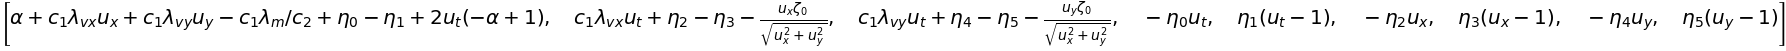

In [14]:
sys.opteqs